In [13]:
from process import process, status
from transforms import master_transform
import pandas as pd
import matplotlib
pd.options.display.float_format = '{:,.2f}'.format
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

## Load and Aggregate All the Data

In [2]:
mt = master_transform.Loader()
df_raw = mt.load_all()

Loading 29 CSV file(s).


## Process a Label the Data

In [3]:
pr = process.Process()
df_process, map_missing, type_missing = pr.process(df_raw)

### Check for the last time the data was updated

In [5]:
df_lu = status.LastUpdate.last_update(df_process)

In [17]:
piv = pd.DataFrame(pd.pivot_table(df_process, values='Amount', index=['Date', 'Account'], columns=[], aggfunc=sum).to_records())

In [18]:
piv

,Date,Account,Amount
0,2013-11-25,UBS Pension,637.50
1,2013-12-25,UBS Pension,708.33
2,2014-01-25,20-26-77 13105881,"21,179.00"
3,2014-01-25,UBS Pension,708.33
4,2014-02-24,20-26-77 13105881,0.00
...,...,...,...
2628,2020-05-20,Citi,966.00
2629,2020-05-21,30-92-90 34061868,-101.82
2630,2020-05-22,20-26-77 13105881,"5,691.47"
2631,2020-05-22,30-92-90 34061868,-37.98


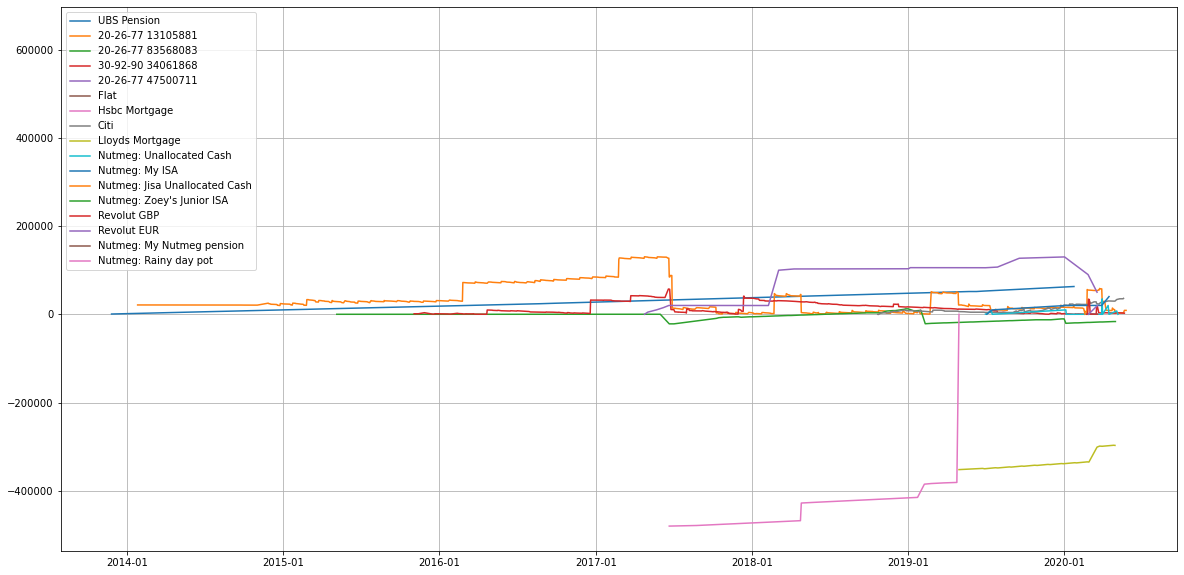

In [22]:
fig, ax = plt.subplots(figsize=(20,10))
for acc in piv['Account'].unique():
    ax.plot(piv[piv.Account == acc]['Date'], piv[piv.Account == acc]['Amount'].cumsum(), label=acc)

ax.legend()
ax.grid()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m"))